In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [69]:
%matplotlib inline

In [70]:
df = pd.read_excel("/content/drive/My Drive/ASM_project/ASM_OPEC_CRUDE_OIL_PRICES.xlsx")

In [71]:
df.head()

,Month,Price
0,1973-10-01,5.89
1,1973-11-01,7.07
2,1973-12-01,8.01
3,1974-01-01,11.94
4,1974-02-01,13.10


In [72]:
df.shape

(548, 2)

In [73]:
df.describe()

,Price
count,548.000000
mean,37.555931
std,28.893237
min,5.890000
25%,16.142500
50%,26.830000
75%,50.457500
max,128.100000


Text(0, 0.5, 'Price in $')

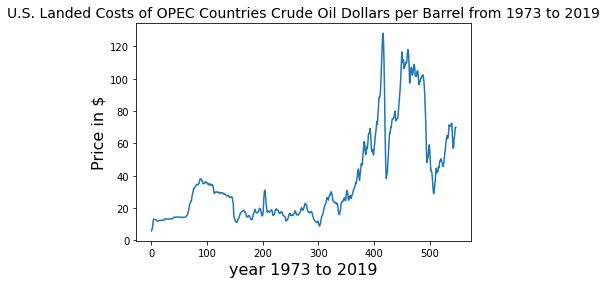

In [74]:
plt.plot(df["Price"])
plt.title('U.S. Landed Costs of OPEC Countries Crude Oil Dollars per Barrel from 1973 to 2019',fontsize=14)
plt.xlabel('year 1973 to 2019',fontsize=16)
plt.ylabel('Price in $', fontsize=16)

ADF Test

In [75]:
X = df["Price"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.432371
p-value: 0.566662
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary


Yt = a + b1Yt-1 + b2yt-2 + ... + bpYt-p + e1







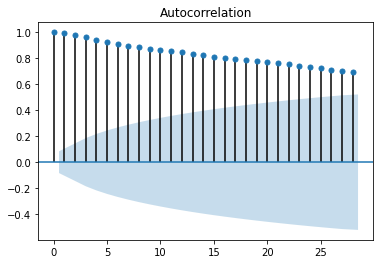

In [108]:
acf_plot = plot_acf(df["Price"])

**PACF PLOT**

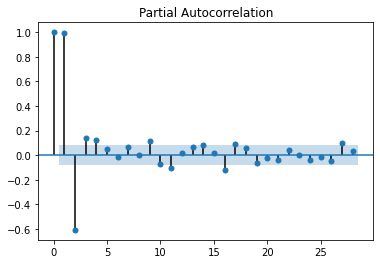

In [77]:
pacf_plot = plot_pacf(df["Price"])

In [78]:
df["Price_shifted_once"]  = df["Price"].shift()

In [79]:
df.head()

,Month,Price,Price_shifted_once
0,1973-10-01,5.89,NaN
1,1973-11-01,7.07,5.89
2,1973-12-01,8.01,7.07
3,1974-01-01,11.94,8.01
4,1974-02-01,13.10,11.94


In [80]:
df.drop('Month', axis = 1, inplace=True)

In [81]:
df.dropna(inplace=True)

In [82]:
df.head()

,Price,Price_shifted_once
1,7.07,5.89
2,8.01,7.07
3,11.94,8.01
4,13.10,11.94
5,13.04,13.10


In [83]:
y = df.Price.values
X = df.Price_shifted_once.values


In [84]:
train_size = int(len(X) * 0.80)

In [85]:

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [86]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lr.coef_

array([0.99674498])

In [89]:
lr.intercept_

0.25578112196181024

In [90]:
y_pred = lr.predict(X_test)

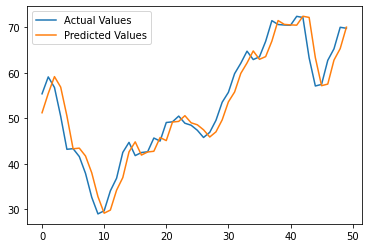

In [91]:

plt.plot(y_test[-50:], label="Actual Values")
plt.plot(y_pred[-50:], label="Predicted Values")
plt.legend()
plt.show()

In [120]:
model = ARIMA(y_train, order=(3,0,0))

In [121]:

model_fit = model.fit()

In [122]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  437
Model:                     ARMA(3, 0)   Log Likelihood                -882.871
Method:                       css-mle   S.D. of innovations              1.812
Date:                Mon, 09 Nov 2020   AIC                           1775.741
Time:                        18:07:18   BIC                           1796.141
Sample:                             0   HQIC                          1783.791
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8502      7.657      3.899      0.000      14.843      44.857
ar.L1.y        1.8704      0.047     39.978      0.000       1.779       1.962
ar.L2.y       -1.0911      0.087    -12.573      0.0